# EDA/insights into the crossing-books datasets

In [565]:
import numpy as np
from scipy.stats import skew
import statistics as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

sns.set()
plt.rcParams["figure.figsize"] = (17,3)

In [566]:
## consideration of "bad lines" is important and it basically stands for 
## a csv line with too many commas, which the case here. 
##If not addressed to many incorrect data entry

col_names = ["User-ID", "ISBN","Book-Rating"]
df_ranking = pd.read_csv('BX-CSV-Dump/BX-Book-ratings.csv', delimiter = ";", error_bad_lines=False, low_memory=False, encoding='ISO-8859–1')
df_ranking.columns = col_names

col_names = ["User-ID","Location","Age"]
df_users = pd.read_csv('BX-CSV-Dump/BX-Users.csv', delimiter = ";", error_bad_lines=False, low_memory=False, encoding='ISO-8859–1')
df_users.columns = col_names

col_names = ["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L"]
df_books = pd.read_csv("BX-CSV-Dump/BX-Books.csv", sep=';', error_bad_lines=False, low_memory=False, encoding='ISO-8859–1')
df_books.columns = col_names







b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


## Data cleaning

In [567]:
# data.isnull() # shows a df with the information whether a data point is null 

print(df_books.isnull().sum())
print('\n')
print(df_users.isnull().sum())
print('\n')
print(df_ranking.isnull().sum())

# quite much nans for age column
# and also publisher and book author to check

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


User-ID          0
Location         0
Age         110762
dtype: int64


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## exploring users

In [568]:
# exploring  datasets

print(df_users.head(10))

## it would be wise do consider location entries seprately
## for the future model to recommend books based on city, district/state, country in a separate way
## since sometimes it makes much more sense taking into the account whole country
## rather than some city in there provided that some countries are not diverse and different in either location

# split column into multiple columns by delimiter 
df_users_locations = df_users['Location'].str.split(',', n = 2, expand=True)
df_users_locations.columns = ['city', 'state/district', 'country']
df_users = pd.concat([df_users, df_users_locations], sort=False, axis = 1)




   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
5        6       santa monica, california, usa  61.0
6        7                 washington, dc, usa   NaN
7        8            timmins, ontario, canada   NaN
8        9          germantown, tennessee, usa   NaN
9       10          albacete, wisconsin, spain  26.0


In [569]:
## what about age column? There seemed to be a lot of unknowns
## let's explore what is inside

df_users['Age'].unique()

## age of ~95+ and 6<  seems to be incorrect

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [570]:
df_users.loc[(df_users['Age'] > 95) | (df_users['Age'] < 6) ,'Age'] = np.NAN
df_users['Age'].isnull().sum()

# almost 112 k nans for user ages, we might
# use central tendecies such as average age of people
# based on country, region
# as for the future models to be improved


112055

In [571]:
df_ranking.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [572]:
# data.isnull() # shows a df with the information whether a data point is null 

print(df_books.isnull().sum())
print('\n')
print(df_users.isnull().sum())
print('\n')
print(df_ranking.isnull().sum())

# quite much nans for age column
# also publisher and book authors to be chekhed

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


User-ID                0
Location               0
Age               112055
city                   0
state/district         1
country                2
dtype: int64


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## books dataset 

In [573]:
## in the book dataset description it was noted that 
## Books are identified by their respective ISBN. 
## Invalid ISBNs have already been removed from the dataset, therefore no need to check them

# as it was noted in the forums, there are issues with year of publication due to incorrent entry
# let's see what is going on there

df_books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [574]:
## it's particually interesing what is the exact issue of the row that contain 
## 'DK Publishing Inc', 'Gallimard', and 0 in the year column
## to decide whethwe we should remove them or there is a chance of fixing it
options = ['DK Publishing Inc', 'Gallimard']
  
# selecting rows based on condition


pd.set_option("display.max_colwidth", None)
df_books[df_books['Year-Of-Publication'].isin(options)]



# seems like there was a shift, also not that book author is in book title

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [575]:
df_books.loc[df_books.index == 209538, "Book-Title"] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
df_books.loc[df_books.index == 209538, "Year-Of-Publication"] = "2000"
df_books.loc[df_books.index == 209538, "Book-Author"] = "Michael Teitelbaum"
df_books.loc[df_books.index == 209538, "Publisher"] = "DK Publishing Inc"
# now it seems to be quite right

df_books[df_books.index == 209538]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN


In [576]:
df_books.loc[df_books.index == 220731, "Book-Title"] = "Peuple du ciel, suivi de 'Les Bergers"
df_books.loc[df_books.index == 220731, "Year-Of-Publication"] = "2003"

# something weird in the name, probably need to chance encode
df_books.loc[df_books.index == 220731, "Book-Author"] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.index == 220731, "Publisher"] = 'Gallimard'

df_books[df_books.index == 220731]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [577]:
df_books.loc[df_books.index == 221678, "Book-Title"] = "Peuple du ciel, suivi de 'Les Bergers"
df_books.loc[df_books.index == 221678, "Year-Of-Publication"] = "2003"

# something weird in the name, probably need to chance encode
df_books.loc[df_books.index == 221678, "Book-Author"] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.index == 221678, "Publisher"] = 'DK Publishing Inc'

df_books[df_books.index == 220731]



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [578]:
## seems to be better with an exception of 0, and 2022+ years
## I assume this issue can be addressed in the future
## for now I am going to keep it as nan

# df_books[(df_books['Year-Of-Publication']>'2022') or (df_books['Year-Of-Publication']==0)] = np.nan
df_books.loc[(df_books['Year-Of-Publication']>'2022') | (df_books['Year-Of-Publication']=='0'), 'Year-Of-Publication'] = np.nan

# converting to date-time convert to allow future interactions
df_books['Year-Of-Publication'] = pd.to_datetime(df_books['Year-Of-Publication'], format='%Y', errors = 'coerce')



df_books.columns



Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [579]:
# checking other column for incorrect/inproper data entries:
# especially in the one we we had trouble with
from pprint import pprint
pprint(df_books['Publisher'].unique().tolist())

['Oxford University Press',
 'HarperFlamingo Canada',
 'HarperPerennial',
 'Farrar Straus Giroux',
 'W. W. Norton &amp; Company',
 'Putnam Pub Group',
 'Berkley Publishing Group',
 'Audioworks',
 'Random House',
 'Scribner',
 'Emblem Editions',
 'Citadel Press',
 'House of Anansi Press',
 'Mira Books',
 'Health Communications',
 'Brilliance Audio - Trade',
 'Kensington Publishing Corp.',
 'River City Pub',
 'Dell',
 'Plume',
 'Three Rivers Press',
 'Ryland Peters &amp; Small Ltd',
 'Cypress House',
 'HarperEntertainment',
 'Scholastic',
 'Aladdin',
 'Too Far',
 'Ballantine Books',
 'Random House Trade Paperbacks',
 'LÃ?Â¼bbe',
 'Goldmann',
 'Alfred A. Knopf',
 'Little Brown &amp; Company',
 'Harpercollins',
 'Avon',
 'Bantam',
 'Fireside',
 'HarperTorch',
 'Bantam Books',
 'Pocket',
 'Tor Books',
 'Tyndale House Publishers',
 'HarperCollins Publishers',
 'Harvest Books',
 'Chambers Harrap Publishers Ltd',
 'Avon Books',
 'Speed Graphics',
 'Sunflower Press',
 'Laurel Leaf',
 'Gallimard

 'Eumo Editorial',
 'Heinle &amp; Heinle Publishers',
 'Autrement',
 'Univ Puerto Rico Pr',
 'Taifa',
 'Archipel',
 "L'Aventurine",
 'Era',
 'Ticknor &amp; Fields',
 'Harper SanFrancisco',
 'Backinprint.com',
 'Sky Blue Press',
 'Black Swab',
 'Econ Tb.',
 'Langen/MÃ?Â¼ller',
 'Assn for Public Transportation',
 'Guilford Publications',
 'Diffusion, DimÃ©dia',
 'Smart Art Press',
 'Fusion Press',
 'Editorial Anagrama',
 'Vicens Vives',
 'Ediciones Destino',
 'Tilbury House Pub',
 'Berg Publishers',
 "Harcourt Children's Books",
 'Mondadori Italian',
 'South Asia Books',
 'Dunmore Press',
 'Tusquets USA Pub',
 'Presbyterian Pub Corp',
 'Rider',
 'Parallax Pr',
 'Snow Lion Publications',
 'Chelsea Green Pub. Co',
 'Rudra Press',
 'Baleine',
 'Walter-Verlag',
 'Frankfurter Verlagsanstalt',
 'Inventeam Llc',
 'Frederick Ungar',
 'Penguin/Puffin Mass Market',
 'Oxford Univ Press',
 'F &amp; W Pubns',
 "Barron's",
 'Merriam-Webster',
 'Microsoft Press',
 'distributed by Hawthorn Books',
 'Ort

 'Quirk Books',
 'Palila Books',
 'Aspect Books',
 'Reed',
 "New Women's Press",
 'University of Otago Press',
 'Bookcraft',
 'Coach House Press',
 "St. Martin's Dead Letter",
 'Luath Press Limited',
 'Dorset House Publishing Co Inc',
 'Universe Books',
 'Prairie Valley Films-Literary Division',
 'Vasso Press',
 'Treasure Press',
 'Fretwater Press',
 'Two-Sixty Press',
 'Singing Reed Pr',
 'Health Communications, Inc',
 'Bookspan',
 'Dedalus, Ltd',
 'Blue Hen Books',
 'Mel Bay Publications',
 'Celebrity Books',
 'Ace Trade',
 'Pleasant Co',
 'Gibbs Smith Publishers',
 'Foreign Languages Press',
 'McPherson',
 'Writers Advantage',
 'Silver Whistle Books',
 'Krause Publications',
 "Company's Coming Publishing",
 'Hanging Loose Press',
 'Client Distribution Services',
 'Compass America Guides',
 'Oni Press',
 'Favorite Recipes Press',
 'Resources for Christian Living',
 'West Virginia Highlands Conservancy',
 'Flower Valley Press, Inc.',
 'Univ Of Wa+press',
 'Fjord Press',
 'Winslow Pres

 'Holloway House Publishing Company',
 'G. Stevens Pub',
 'Discovery Books',
 'Global Health Solutions',
 'Scripture Union Publishing',
 'Joseph',
 'Global Academic Publishing',
 'Pan Macmillan Australia',
 'McPhee Gribble/Pe',
 'Music Book Services',
 'Mills &amp; Boon',
 'Wakefield Press Pty, Limited (AUS)',
 'Mac Productions',
 'Daedalus Books Inc Remainders',
 'Pan Australia',
 'Profile Books Ltd',
 'Constable Robinson',
 'Phoenix Audio',
 'Feature',
 'Spinifex Press',
 'Diane Pub Co',
 'Australian Broadcasting Corp',
 'Travellerseye Ltd.',
 'Parascension Press',
 'Trade book distribution by Simon and Schuster',
 'Boheme Press',
 'General Store Publishing House',
 'Holt, Rinehart, and Winston',
 'Critics Choice Paperbacks',
 'W H Freeman &amp; Co.',
 'Arowhena Pub. Co',
 'NC Press',
 'Hallmark Card, Incorporated',
 'Grosvenor House Pr',
 'Macmillan of Canada',
 'Tom Doherty Associates',
 'Dell Pub. Co',
 'Breakwater Books Ltd',
 'Circlet Press',
 'Soundprints',
 'HarperCollinsPubli

 "Editions d'Acadie",
 'Lancaster Books',
 'Aidc',
 'White Wolf Publishing',
 'Kingfisher Books',
 'Pallas Athene Publishers',
 'Health Press (NM)',
 'Cornelsen',
 'Black Lace',
 'Dove Books Audio',
 "Penguin Children's Audiobooks",
 'Lantern Books',
 'Senate Books',
 'P. Tisseyre',
 'Edition Stemmle',
 'Knopf; [distributed by Random House]',
 'Bluejay',
 'General Paperbacks',
 'MacLaurin Institute',
 'Virago Press Limited',
 'Frances Lincoln',
 "L'Olivier",
 'R. Marek Publishers',
 'Harper Collins',
 'HarperCollins ;',
 'Hounslow Press',
 'Lester Orpen Dennys',
 'Eyre Methuen',
 'Alan Sutton Publ Ltd',
 'Distributed in the trade by Van Nostrand Reinhold',
 'La Galera',
 'Hanser Gardner Publications',
 'Casagrande',
 'David Bateman Ltd',
 'British Columbia Provincial Museum',
 'Imagination Studio',
 'Foulsham',
 'Morgan &amp; Morgan',
 'Summer Wild Productions',
 'Houghton Mifflin Co (Jp)',
 'Casterman Editions',
 'Carlsen Verlag Gmbh',
 'Leap Frog',
 'Transworld Publishers Limited',
 

 'Granite Publishing, L.L.C.',
 'Zzdap Publishing',
 'Brockhaus, Haan',
 'Berliner Taschenbuch Verlag',
 'Zytglogge',
 'Alanna Nash',
 'R Bemis Pub Ltd',
 'Princeton Publishing Company',
 'Fredric H. Jones &amp; Associates',
 'John Platter',
 'Andrew McDowall',
 'Alloybooks',
 'Jameson Books',
 'Templar Books',
 'Nosil a Publishing',
 'Newroad Pub',
 'Collier Macmillan',
 'East/West Bridge',
 'Sixth Avenue Books',
 'Ashton-Tate',
 'Son-Rise Publications &amp; Distribution Company',
 'Beach Holme Publishing',
 'Weitbrecht Verlag',
 'Grupo Editorial Planeta Argentina',
 'Ivy Press',
 'Wallaby Books',
 'Hardway Pr',
 'Heartstong Presents',
 'White Dove International',
 'HealthMark Centers Inc',
 'Cornerstone',
 'Arcturus Publishing',
 'Footprint Handbooks',
 'Chivers Word for Word Audio Books',
 'Pearson Learning',
 'Jeppesen Sanderson, Inc.',
 'Urantia Foundation',
 'Samson Publishers',
 'Tales of the Mojave Road Pub. Co',
 'Morris Communications Company',
 'BrownHerron',
 'Tessloff',
 '

 'Swedenborg Foundation',
 'I D G Books Worldwide',
 'Arrow Books',
 'Jane Yolen Books',
 'Noble Pr',
 'Editions Fleuve noir',
 'Shire Books',
 'L.J. Veen',
 'HarperCollins Publishers Inc.',
 'Berkley Hardcover',
 'Mundania Press LLC',
 'Abbeville Kids',
 'Nite Owl Books',
 'The Professional Equity Group Ltd.',
 'Lincoln Publishing',
 'A. Sutton',
 'Aguilar Aguilar',
 'Presses CitÃ?Â©',
 'Maisonneuve &amp; Larose',
 'Editions Stock',
 'Stock 2',
 'Salvator',
 'Bruguera, S.A.',
 'Wrox Press Inc',
 'Wizards of Coast Inc.',
 'Daybue Publishing',
 'Alabaster',
 'Comstock Book Distributors',
 'Franklin Pub.',
 'Word Aflame Press',
 'Bantam Doubleday Dell Publishing Group Inc',
 'Ashgrove Publishing',
 'Hawkmoon Publications',
 'Castle Communications',
 'Pyramid',
 'Proteus Pub Co',
 'Harcourt, Brace, Jovanovich',
 'Sepia',
 'Mac Publishing',
 'Gage Pub',
 'Plain View Pr',
 'Quest International',
 'IMPACT',
 'Burns &amp; MacEachern',
 'Association for the Preservation of Virg',
 'Pretendgeni

 'Compendium',
 'Paul Watkins Publishing',
 'Corporation of Sheffield; Wakefield, EP Publishing Ltd',
 'OCLC',
 'A &amp; B Book Dist Inc',
 'Planetesimal Publishing Ltd',
 'Burnett Books',
 'Menard Press',
 'Pergamon',
 'Desert Pubns',
 'Ash &amp; Grant',
 'Umi Research Pr',
 'William Blackwood',
 'Bellevue Books',
 'Bell',
 'Forest Press',
 'Distributed by Crown Publishers',
 'Carlton Books Ltd',
 'Ordnance Survey',
 'W &amp; R Chambers',
 'Birlinn Publishers',
 'Johnston and Bacon',
 'Chelsea House : distributed by Scribner Book Companies',
 'British Fantasy Society',
 'Chambers',
 'Friends of Box Hill Association',
 'I.P.A.C.S.',
 'Wizards Attic',
 'Pagan Pub',
 'Morrigan Publications',
 'James A. Rock &amp; Company Publishers',
 'Barker',
 'Last Gasp of San Francisco',
 'III Pub',
 'Pennsylvania State University Press',
 'Connections Book Publishing',
 'Gothic Image Publications',
 'Zambezi Publishing',
 'Science Fiction Distributors',
 'W Paul Ganley Pub',
 'Arkham House Pub',
 'A

 'Ophrys',
 'Bard Books',
 'Webcartoons LLC',
 'American Ceramic Society',
 'Ceramics Monthly',
 'Naumann u. GÃ?Â¶bel, K.',
 'Stephen Ministries',
 'Newsweek; distributed by Harper &amp; Row',
 'American Heritage Pub. Co.; distribution by McGraw-Hill',
 'Vandam Press, Inc.',
 'Old School Books',
 'LazerBooks',
 'Chitra Publications',
 'Possibilities',
 'Elsevier Manteau',
 'Girl Scouts of the USA',
 'Kidsbooks, Inc',
 'Monolith Press',
 'Boy Scouts Of America',
 'VIP Publishing',
 'Desktop Pub',
 'Research and Education Association',
 'Living Love Publications',
 'Professional Press Books',
 'In-Tune Books',
 "Writer's Digest",
 'R. R. Bowker',
 'Scott Foresman/Addison-Wesley',
 'Allegro Press',
 'Akal',
 'Abrams',
 'Editora Atica',
 'Batsford',
 'Worth Publishing',
 'Little, Brown and Co',
 'Buchet Chastel',
 'Meadowbrook/see Simon Schust',
 'Consignment &amp; Thrift Store Publishing',
 'Sunstar Publishing (IA)',
 'Universitas',
 'Birchwood Page Publishing',
 'Healthy Life Publication

 'Abbey Library',
 '[distributed by] G. Stevens Pub',
 'RoutledgeFalmer',
 'November Press',
 'International Imports',
 'Landauer Books',
 'Sufism Reoriented',
 'Moksha Press',
 'Kala Occult Publishers',
 'McClelland and Stewart-Bantam',
 'Plains Pub',
 'Deutscher Taschenbuch Verlag GmbH &amp; Co. KG',
 'Editions de Fallois',
 'Viking Adult',
 'Edicial',
 'Ediciones Ekare',
 'Northeast Fndtn for Children',
 'Distributed by General Distribution Services',
 'Island Lake Press',
 'Wever',
 'Thornton Publishing Inc.',
 'Information Today',
 'Vivisphere Pub',
 'Tascabili Economici Newton',
 'Double Eagle Press',
 'Lightning Pubns',
 'Image Cascade Publishing',
 'Egmont Ehapa',
 'Verlag Kiepenheuer &amp; Witsch GmbH &amp; Co KG',
 'Pergamon Press',
 'Michael Omara Books Ltd',
 'Universidad Complutense, Facultad de Derecho, SecciÃ³n de Publicaciones',
 'Earthspirit Inc.',
 'New Video Group Inc',
 'Grolier Books',
 'Ã?lbaum',
 'Karisto',
 "C. Scribner's Sons",
 'Michael Omara',
 'Books for You

 'Wind Women Press',
 'Finney Co',
 'Rustic Getaways',
 'K M S Products',
 'Parachute Press',
 'Espasa-Calpe, S.A.',
 'Universidad del PaÃ\xads Vasco, Servicio Editorial',
 'Berry Books',
 'Ã?ditions de minuit',
 'Seafarer',
 'Penguin Studio Books',
 'Scenic Art',
 'Tabris Press',
 'Five Star Western',
 'Hill Street Pres',
 'Anthos',
 'Straight Arrow Books; [distributed by Quick Fox Inc., New York',
 'Cantos International',
 'Nueva Imagen',
 'Fifth House',
 'Snowbound Pr',
 'Rhiannon Pubns',
 'North Star Pr of st Cloud',
 'R. F. Quinn Publishing Co.',
 'Lothrop, Lee &amp; Shepard',
 'Wolfgang Publications',
 'Gilded Age Pr',
 'Steidl Publishing',
 'Lighthouse Press',
 'Editions du NoroÃ£it ; Buschek Books',
 'Tor books/SFBC Fantasy',
 'Blizzard Publishing',
 'Eddie Tern Press',
 'Peak Skill',
 'Franciscan Institute, the',
 'Scholastic Australia Pty Ltd',
 'Hampton Roads Pub Co',
 'CPA Books',
 'EcceNova Editions',
 'Addison Wesley Longman ELT Division (a Pearson Education company)',
 '

 'Forest Publishing',
 'Quay Publications (Brixham)',
 'Librio',
 'IndiaInk',
 'Ediciones Internacionales Universitarias',
 '(49 Poland St., W.1), BPC Unit 75',
 'The Armand Press',
 'Manga 18',
 'Revista de Occidente En Alianza Editorial',
 'Yatay',
 'distributed by Prentice-Hall International',
 'Gibson Square Books',
 'Broadman Press',
 'Shantini Center',
 'Mira Editores',
 'P3 Publications',
 'Wolters-Noordhoff',
 'Mantra Publishing',
 'Kawainui Press',
 'Methuen Publishing',
 'Nueva Era',
 'Pedestal Press',
 'Strombergs Chicks &amp; Pets',
 'Wiley-VCH',
 'Limmat Verlag',
 'Buckland Publications',
 'Quadrata',
 'Cuadernos para el DiÃ¡logo',
 'Humanity Books',
 'Centre Delta : diffusion, A. Colin',
 'Ediciones El PaÃ\xads',
 'Coppens &amp; Frenks. Publishers',
 'Denver Press',
 'La Dispute',
 'Merino &amp; Sanchez, Inc.',
 'Edicions de Mall',
 'Alhambra',
 'Fondo de Cultura Economica de Espana, S.L.',
 'Transaction Pub',
 'Souvenir',
 'InformaciÃ³n y Publicaciones',
 'Ediciones UVE'

 'Nettle Creek Publishing Co',
 'Christian de Bartillat',
 'SparrowHawk Publications',
 'Reed Publishing (NZ)',
 'Oh Edition',
 'Kaybee Press',
 'Hamlyn : Phoebus',
 'Editions Du Lombard',
 'Murdoch Books',
 'Criterion Collection',
 'Facts on Demand Press',
 'Vereniging ter Bevordering van het Vlaamse Boekwezen',
 'Chick Publications',
 'Curtin &amp; London',
 'Guild of Master Craftsman Publications',
 'Arkansas Arts Center, Decorative Arts Museum',
 'Ariel Publications',
 'Ecam Publications',
 'Guild of Master Craftsman Publications Ltd',
 'Van Neste Books',
 'Craft Supplies USA',
 'Friends of the Library',
 'Publicaciones de la Residencia de Estudiantes',
 'Visor Libros',
 'Terra Nova Press',
 'Guild Publishing',
 'Soccer for Americans',
 'Avalon House Pub.',
 'Trust Pub.',
 'Cherry Tree Publications',
 'B &amp; B Audio Inc',
 'Seastar Pub Co',
 'Clear Light Pub',
 'Pride Publications',
 'McGraw-Hill/Spanish Imports',
 'wandering soliton publications (a division of) The Buckmaster In

 'Ecrits des forges',
 'Rj Berg &amp; Co',
 'Southwest Educational Enterprises',
 'Inter-varsity Missions',
 'University Science Books',
 'International Publishing Company',
 'Byron Preiss Visual Publications, Inc.',
 'Middlefinger Press',
 'Telos Press, Limited',
 'Rourke Publishing',
 'American Evangelistic Association',
 'Elucid Press',
 'Landmark Pr',
 'Editorial Betania',
 'Ediciones Corregidor S.A.I.C.I. y E.',
 'Betania',
 'Dembner Books',
 'Coleman Publishing Inc',
 'Gordon Press',
 'Rourke Publishing Group',
 'Harvey House',
 'Ardis Publishers',
 'Ghost Hunter Productions',
 'Copper Beech',
 'PowerKids Press',
 'Upper Room',
 'Hardshell Pub',
 'Pendleton Books',
 'Pryamid Publications',
 'Compass Point Books',
 'Blue Earth Books',
 'Available Press',
 'Hendrickson Publishers@inc',
 'Vision Pr',
 'Navajo Curriculum Center',
 'Grolier Educational Corp',
 'Cornerstone Press Chicago',
 'Archway',
 'CSS Publishing Company',
 'McRoy &amp; Blackburn',
 'Masterpath, Incorporated',
 'J

 'Fachbuchverlag Leipzig',
 'Herald Books',
 'Zondervan*@ Publishing House',
 'Taste of Home',
 'Estragon Press',
 'Paraview Press',
 'Agate',
 'Agora Health Books',
 'Music Book Services Corporation',
 'Ediciones Martinez Roca, S.A.',
 'DAW Books, Inc.',
 'In Univ+press',
 'Rupa and Co.',
 "Merlyn's Pen",
 'Lighten Up Enterprises Incorporated',
 'Carewise, Incorporated',
 'Performance Publishing Company',
 'American Publishing Corp.',
 'P S I &amp; Associates',
 'Press-Tige Publishing Company Inc',
 'Helicon Nine Editions',
 'Sparrow Corporation',
 'Cocolo Editorial',
 'Jove Books Bookspan Large Print Edition',
 'Wicked Publications',
 'Portunus Publishing Co.',
 'Harpercollins (P)',
 'Haag + Herchen',
 'Taylor Press',
 'Manhattan by Goldmann',
 'Time Life',
 'Ten Eyck Acupressure Reflexology',
 'Fideler Company',
 'Puddleboots Publishing',
 'Tehabi Books',
 'Phat Books Publishing',
 'Ios Pr Inc',
 'Anthem Press',
 'Michael C. Carlos Museum',
 'Blue Poppy Press',
 'Museum of Fine Arts

 'Harcourt Brace and Company',
 "Sheperd's Voice Publications",
 'Rowman &amp; Littlefield Pub Group',
 'Hopeless Records',
 'Oberstebrink Verlag',
 'Monterey Press',
 'Trumpet Club (Special edition)',
 'Oak Tree Press',
 'Silver Maple Pubns',
 'Granta Editions',
 'Dreams Unlimited',
 'Penguin Group',
 'Alfred a. Knopf',
 'Raw Nerve Books',
 'A Crossings Book Club Edition',
 "Adler's Foreign Books Inc",
 'The Liturgical Press',
 'Ediciones Torremozas',
 'Bayeux Arts,Inc.',
 'Godine, David R+publ Inc',
 'Inst for Labor &amp; Mental Health',
 'Il Castoro',
 'authorsonline',
 'Ayers &amp; James',
 'Available from Starseed Seminars',
 'Butterfingers',
 'R. W. Baron',
 'Collins Harvill Pr',
 'Uppsala University',
 'Piatkus Publishers Ltd',
 'New American Library / Signet',
 'Editions Complexe',
 'Sonters Pub Ink',
 'Heritage Books Inc',
 'Paramount Publishing (IL)',
 'Health Plus Pub',
 'Goblinshead',
 'Delorme Mapping Co',
 'Spradlin &amp; Assocs',
 'Regional Publishing Company',
 'Biltmor

 'Longman Trade/Caroline House',
 'Macrae Smith Co',
 'P. S. Eriksson',
 'Sailing Association',
 'Stoeger Pub Co',
 'Institute of Social, Economic and Govt. Research, University of Alaska',
 'Audio-Forum',
 'David C. Cook Publishing Co.',
 'Yellowstone Association for Natural Science &amp;',
 'Center for Civic Education',
 'Pacific Search Press',
 'Scandisk Inc',
 'Jackson Mountain Pr',
 'Good Medicine Books',
 'Palmer/Pletsch Associates',
 'Westcliffe Pub',
 'Joan Keil Enterprises',
 'North/Southwest Pub Collection',
 'Gaff Pr',
 'Whistle Pr',
 'Hardscratch Pr',
 'Ecopress',
 'Rebecca L. Harvin',
 'Fallbrook Pub. Group',
 'Rose Printing',
 'Magnanimity House',
 'Alaska Native Language Center',
 'Krieger Pub. Co.',
 'The Derrydale Press',
 'Thoth Publications',
 'Rosendale Press',
 'Melchior Publishing',
 'American Liberty Publishers',
 'Kingscote Publishing',
 'American Muslim Foundation',
 'Adnkronos libri',
 'Book of the Month Club with Grove/Atlan',
 'Rajneesh Foundation Internatio

 'Torchlight Publications',
 'Pro-Ed',
 'Oyster Books',
 'Playmore Books',
 'M E S/F X Publishing',
 'Multnomah Kidz',
 'Imagine Via Kelli',
 'Verlag die Blaue Eule',
 'Gault Millau',
 'Passeggiata Pr',
 'Kagan Cooperative Learning',
 'New Life Publishers',
 'McDougal Publishing Company',
 'Samark Publishing',
 'Martin-Verlag Berger',
 'Da Trendz Publications, Inc.',
 'Theosophical Univ Pr',
 'Sea Challengers',
 'Scottish Sports Council - SportScotland',
 'Bayeux Arts',
 'W &amp; H Publishers',
 'Pella Publishing Company',
 'Black Spring Books',
 'MusicVision International',
 'Micheal Joseph',
 'Trinity Publications',
 'G. Gannett Pub. Co',
 'Thieme, Stuttgart',
 'Bertelsmann-Lexikon-Verlag',
 'Domowina',
 'Hochschulverlag',
 'Fietkau',
 'Institut fÃ¼r Kulturanthropologie und EuropÃ¤ische Ethnologie der '
 'UniversitÃ¤t Frankfurt',
 'Reynolds Publishing Company',
 'Dorset Pr',
 'Sulgrave Press',
 'Entertainment Weekly Books',
 'The Rosen Group',
 'Distributed by H. Holt and Co',
 'Shar

In [580]:
## REMINDER

# data.isnull() # shows a df with the information whether a data point is null 

print(df_books.isnull().sum())

# and also publisher and book author to check

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication    4633
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64


In [581]:
df_books[df_books['Book-Author'].isnull()]

# since it's just one entry, one can find the missing value by simple google search
# it was Larissa Anne Downes

df_books.loc[df_books.index == 187689, "Book-Author"] = "Larissa Anne Downes"

# what about publishers, 2 values are missing
df_books[df_books['Publisher'].isnull()]

# seems like we will not be able to find it within database,
# therefore we can refer to to the book using ISBN and year of publication
# NovelBooks, Inc., CreateSpace for id = 128890 and 129037 respectively

df_books.loc[df_books.index == 128890, "Publisher"] = "NovelBooks, Inc."
df_books.loc[df_books.index == 129037, 'Publisher'] = 'CreateSpace'
df_books.loc[(df_books.index == 128890) | (df_books.index == 129037)]

# Done!

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002-01-01,"NovelBooks, Inc.",http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001-01-01,CreateSpace,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


## Ranking dataset

In [582]:
# Dataset exploration

df_ranking.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [583]:
print(df_ranking.head())

# ranking is "central" dataset that will be used to create
# recommendation system
# therefore, we need consistency in users and books
# meaning there should be no books that are not in original books dataset
# and no users that are not in original users dataset
# to make recommendation system use every piece of information
# that containt all 3 datasets


df_ranking_filtered_1 = df_ranking[df_ranking['ISBN'].isin(df_books['ISBN'])]
df_ranking_filtered_2 = df_ranking_filtered_1[df_ranking_filtered_1['User-ID'].isin(df_users['User-ID'])]
df_ranking_filtered_1.head()

print(len(df_ranking) - len(df_ranking_filtered_1))

# 118644 ranking has no ISBN information in books dataset
# meaning we loose valuable infroamtion such as year, publisher and title


df_ranking_filtered_2.head()


   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
118644


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Insights of datasets

In [584]:
number_of_ratings_by_user = df_ranking_filtered_2.groupby(["User-ID"])['Book-Rating'].count()
print(number_of_ratings_by_user.describe(include='all'))

# seems like on average each user provides with ~11 book evaluations
# however it's makes it harder for the model 
# to learn when there is not much information about information about particuler users
# say we want all users to provide their opnition about ~5 books at least
# but it's not always the case

print(f"Total numbers of users that rated book {len(df_ranking_filtered_2['User-ID'].unique())}")
print(f'Number of users that rated at least 5 books is {len(number_of_ratings_by_user[number_of_ratings_by_user.values>5])}')
print(f'Number of users that rated at least 3 books is {len(number_of_ratings_by_user[number_of_ratings_by_user.values>3])} ')

count    92106.000000
mean        11.195101
std         88.685678
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max      11144.000000
Name: Book-Rating, dtype: float64
Total numbers of users that rated book 92106
Number of users that rated at least 5 books is 17714
Number of users that rated at least 3 books is 24268 


In [585]:
number_of_ratings_by_book = df_ranking_filtered_2.groupby(["ISBN"])['Book-Rating'].count()
print(number_of_ratings_by_book.describe(include='all'))

# each books was rated ~3 times in average

# here we want the same
# as many ratings assigned by users as possible
# let's see how many books were rated at least 5 times


print(f"Total numbers of books that was rated at least once {len(df_ranking_filtered_2['ISBN'].unique())}")
print(f'Books that were rated by at least 5 users  {number_of_ratings_by_book[number_of_ratings_by_book.values>5].count()}')

# it's impotant factor in content based recommendation systems



count    270151.000000
mean          3.816888
std          13.811690
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: Book-Rating, dtype: float64
Total numbers of books that was rated at least once 270151
Books that were rated by at least 5 users  32737


In [586]:
df_ranking_filtered_2['Book-Rating'].unique()

## let's see what average per book looks like

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [587]:
df_average_rating = df_ranking_filtered_2.groupby(['ISBN'])['Book-Rating'].agg('mean')
df_average_rating = df_average_rating.sort_values(ascending = False)
df_average_rating.head()

df_average_rating.head(3).index.to_list()


print('Books with the highest average rating: \n')
for book_code in df_average_rating.head(3).index.to_list():
    
    print(df_books.loc[df_books['ISBN'] == book_code, 'Book-Title'].iloc[0])
    


Books with the highest average rating: 

To The Rescue (Move and Play)
Prometheus Bound (Greek Tragedy in New Translations)
Dinosaurs: A Celebration


<AxesSubplot:title={'center':'Total rating'}>

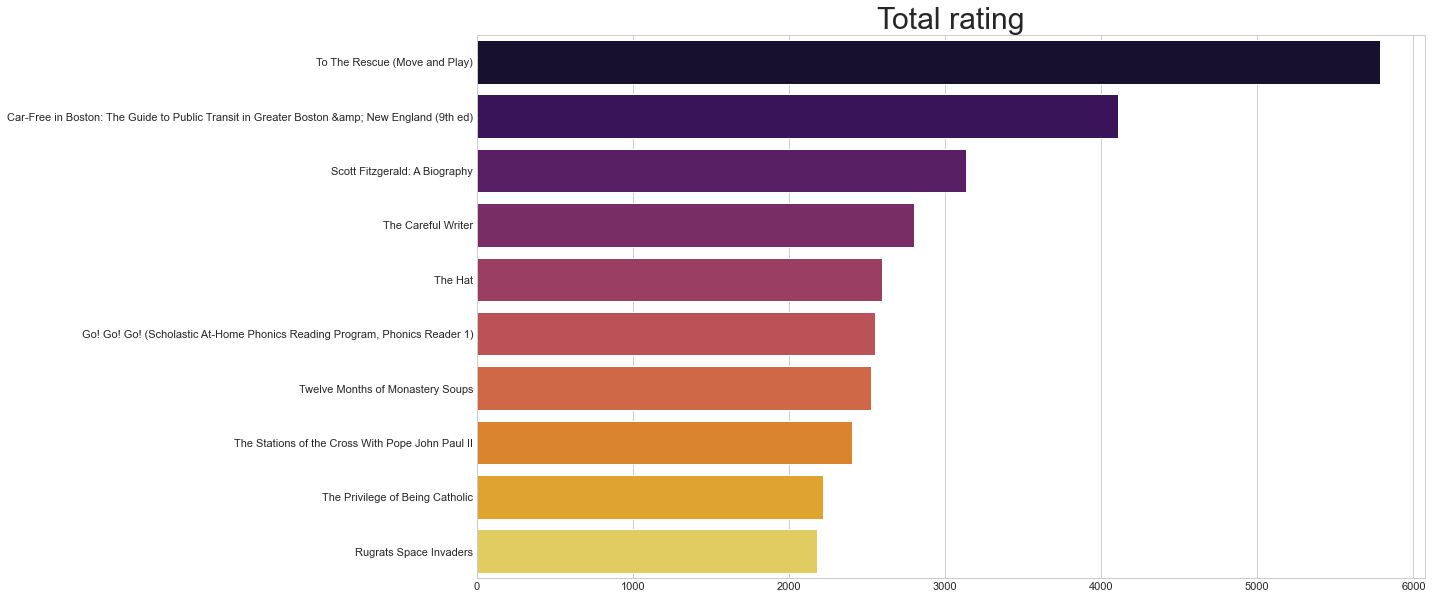

In [595]:
df_total_clicked = df_ranking_filtered_2.groupby(['ISBN'])['Book-Rating'].agg('sum')
df_total_clicked = df_total_clicked.sort_values(ascending = False)
total_rated = df_total_cliked.head(10).index.to_list()

names = []
for book_code in total_rated:
    
    names.append(df_books.loc[df_books['ISBN'] == book_code, 'Book-Title'].iloc[0])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(17, 10))
plt.title('Total rating', fontsize = 30)
sns.barplot(x = df_total_clicked.head(10).values, y = names, palette='inferno')

<AxesSubplot:>

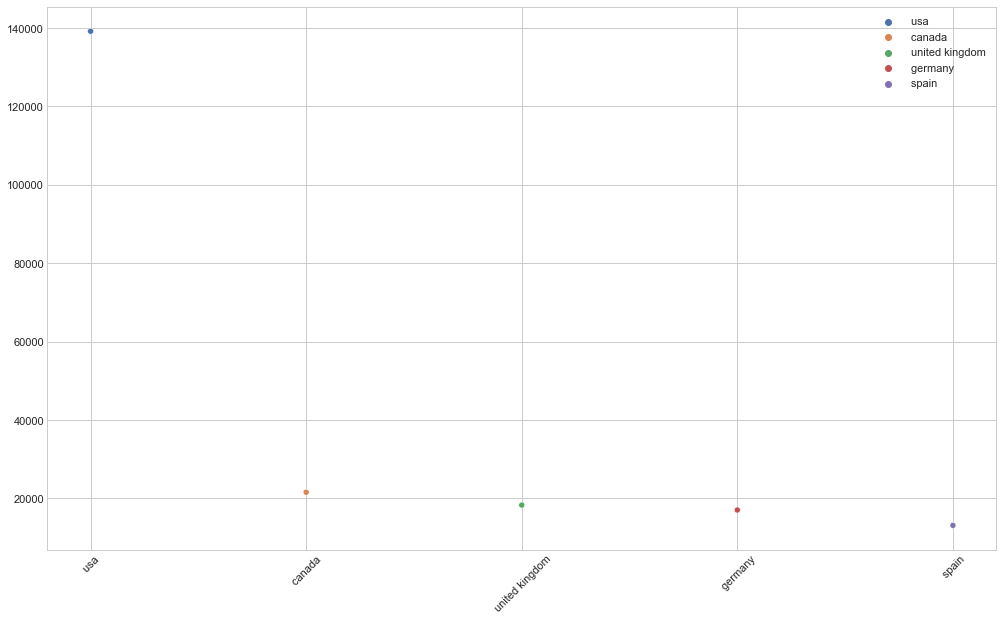

In [589]:
df_top_countries = df_users['country'].value_counts()
df_top_countries = df_top_countries.sort_values(ascending = False)

top_10_countries = df_top_countries.index[0:5]
top_10_countries_counts = df_top_countries.values[0:5]

plt.figure(figsize=(17,10))
plt.xticks(rotation=45)
sns.scatterplot(x=top_10_countries, 
                y=top_10_countries_counts,
                hue=top_10_countries,
                )

# Lots of reviews are coming from US - almost 140000 reviews,
# right after Canada, UK Germany and Spain with a values
# that reaches almost up to 20k

## Building baselines AND application of ML models discussed in the slides

Baselines to be constructed: 
* "Most popular"
* A basic content filtering model
* Collaborative filtering models based on the KNN
* SVD++ models.